# Distribuição Chi-Quadrado 

Para cada $m$ positivo, a distribuição $Gamma(m/2, 1/2)$ é chamada de distribuição $\chi^2$. Ela foi primeiramente descrita por Helmert para computar a distribuição amostral de uma população normal. Vamos ver como a normal se relaciona mais a frente. 

$$
f(x) = \frac{1}{2^{m/2}\Gamma(m/2)}x^{m/2 - 1}e^{-x/2}
$$


## Propriedades

Se $X \sim \chi^2(m)$, então:

$$
E(X) = m
$$

$$
Var(X) = 2m
$$

$$
\psi(t) = \left(\frac{1}{1-2t}\right)^{m/2}, t < \frac{1}{2}
$$

## Soma de $\chi^2$

Se $X_1, ..., X_k$ são independentes e cada uma tem grau de liberdade $m_i$, então $X_1 + ... + X_n$ tem distribuição $\chi^2(m_1 + .... + m_k)$

## Relação com a Normal

Se $X$ tem distribuição normal padrão, $Y = X^2 \sim \chi^2(1)$

De fato, se juntarmos as últimos dois teoremas, veremos que a soma de quadrados de normais independentes e identicamente distribuidas será $\chi^2(m)$, onde $m$ é o número de parcelas. 

## Implementação

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import chi2

from matplotlib import animation, cm
from IPython.display import HTML

# Random Object
ro = np.random.default_rng(1000)  # Para assegurar reprodutibilidade

In [2]:
degree_freedom = 10
mean, var, skew, kurt = chi2.stats(degree_freedom, moments = 'mvsk')
print('Propriedades')
print('Média: {}'.format(mean))
print('Var: {}'.format(var))
print('Assimetria: {}'.format(skew))
print('Curtose: {}'.format(kurt))

Propriedades
Média: 10.0
Var: 20.0
Assimetria: 0.8944271909999159
Curtose: 1.2


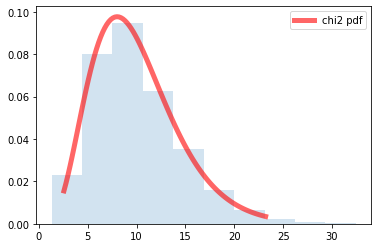

In [3]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(chi2.ppf(0.01, degree_freedom), 
                chi2.ppf(0.99, degree_freedom), 100)
ax.plot(x, chi2.pdf(x, degree_freedom), 'r-', lw=5, alpha=0.6, label='chi2 pdf')

r = chi2.rvs(degree_freedom, size = 10000)
ax.hist(r, density = True, alpha = 0.2)

ax.legend()

plt.show()

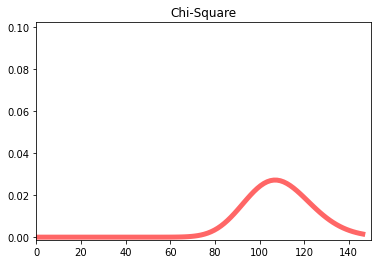

In [4]:
fig, ax = plt.subplots()

line, = ax.plot(x, chi2.pdf(x, degree_freedom), 'r-', lw=5, alpha=0.6)

ax.set_xlim((0,150))
ax.set_title('Chi-Square')

def animate(i, degree_freedom):
    
    x = np.linspace(0, chi2.ppf(0.99, degree_freedom + i), 100)

    line.set_data(x, chi2.pdf(x, degree_freedom + i))
    
    return line,

anim = animation.FuncAnimation(fig, animate, frames = 100,
                               interval = 50, fargs=(degree_freedom,), repeat = False)
HTML(anim.to_html5_video())

# Distribuição Conjunta da média e variância amostrais

$X_1,...,X_n$ formam uma amostra aleatória com distribuição normal e com média $\mu$ e variância $\sigma^2$ desconhecidos. Estamos interessados na distribuição conjunta dos estimadores de máxima verossimilhança para média e variância da amostra. 

## Teorema de Basu

Sejam $\hat{\mu} = \bar{X}_n$ e $\hat{\sigma}^2 = \frac{1}{n}\sum_{i=1}^n (X_i - \bar{X}_n)^2$ a média e variância amostrais, respectivamente. Então $\hat{\mu}$ tem distribuição normal com média $\mu$ e variância $\sigma^2 /n$, enquanto $\hat{\sigma}^2$ tem a distribuição $\chi^2(n-1)$, isto é, com $n-1$ grau de liberdade. Além disso elas são independentes. 

Esse teorema é um pouco mais complexo e, na verdade, essa seria uma espécie de aplicação do teorema, na verdade. O teorema de Basu diz que: 

> Se $T$ é uma estatística suficiente [completa](https://lucasmoschen.github.io/TA_sessions/infestatistica/SufficientStatistics/#definicoes-adicionais) (Considere, nesse teorema, $g$ uma função integrável limitada) para $\theta$ e $A$ uma estatística ancillary, então $T$ é independente de $A$. Nesse caso $\hat{\mu}$ é completa suficiente e $\hat{\sigma}^2$ é ancillary, por que não depende de $\mu$. 

O mais interessante é que essa propriedade é só vista com a [distribuição normal](https://arxiv.org/pdf/1810.01768.pdf)! Olhem a página 9.  

### Demonstração 

O livro tem uma abordagem um pouco mais voltado à Álgebra Linear. Aqui vou mostrar uma ideia um pouco diferente, onde vocês podem demonstrar os passos, como exercício. 

1. Passo 1: $\sum_{i=1}^n X_i^2 = n\hat{\sigma}^2 + n\hat{\mu}^2$

    - Dica: Escrever $\hat{\sigma}^2$ e abrir em três somatórios. 

2. Passo 2: $\sum_{i=1}^n (X_i - \mu)^2 = n\hat{\sigma}^2 + n(\hat{\mu} - \mu)^2$

    - Dica: O Passo 1 é um caso especial do Passo 2. O processo é o mesmo.

3. Passo 3: $\hat{\mu}$ é independente de $X_i - \hat{\mu}, i = 1,...,n$.

    - Dica: Montar a pdf conjunta de $X_1, ..., X_n$ (já fizemos isso atraveś da verossimilhança) e fazer uma mudança de variável $Y_1 = \hat{\mu}, Y_2 = X_2 - \hat{\mu}, ..., Y_n = X_n - \hat{\mu}$. Com essa mudança, é possível montar a pdf como função de $y_1,...,y_n$. Esse processo é um pouco mais chato, mas é bom lembrar como fazez mudança de variável para pdfs. [Aqui você pode conferir como](https://en.wikipedia.org/wiki/Probability_density_function#Vector_to_vector). É importante lembrar que é uma função de $y$ após transformada e não de $x$. 
    - Dica 2: Fatorizar a pdf conjunta. Você vai ver como se destaca a independência aqui. 

4. Passo 4: Mostrar que $\hat{\mu}$ e $\hat{\sigma}^2$ são independentes. 


#### Referências

[1](https://jekyll.math.byuh.edu/courses/m321/handouts/mean_var_indep.pdf)
[2](http://www2.stat.duke.edu/courses/Fall18/sta611.01/Lecture/lec12_mean_var_indep.pdf)


## Simples visualização

Eu gostaria de comparar o que acontece com a média e variância amostral da distribuição normal e da distribuição gamma. Para isso, geero amostras de tamanho $n$, calculo as estatísticas e salvo. Faço esse procedimento o número de pontos que quiser. 

In [5]:
ite = 10000
n = 10000
# Parâmetros da Normal
mu = 5
sigma = 2
# Parâmetros da Gamma
alpha = 5
beta = 4

In [6]:
means = np.zeros((ite,2))
variances = np.zeros((ite,2))

for i in range(ite): 
    X = ro.normal(loc = mu, scale = sigma, size = n)
    Y = ro.gamma(shape = alpha, scale = 1/beta, size = n)
    
    means[i,0] = np.mean(X)
    means[i,1] = np.mean(Y)

    variances[i,0] = np.var(X, ddof = 0)
    variances[i,1] = np.var(Y, ddof = 0)

coef_normal = np.polyfit(x = means[:,0], y = variances[:,0], deg = 1)
coef_gamma = np.polyfit(x = means[:,1], y = variances[:,1], deg = 1)

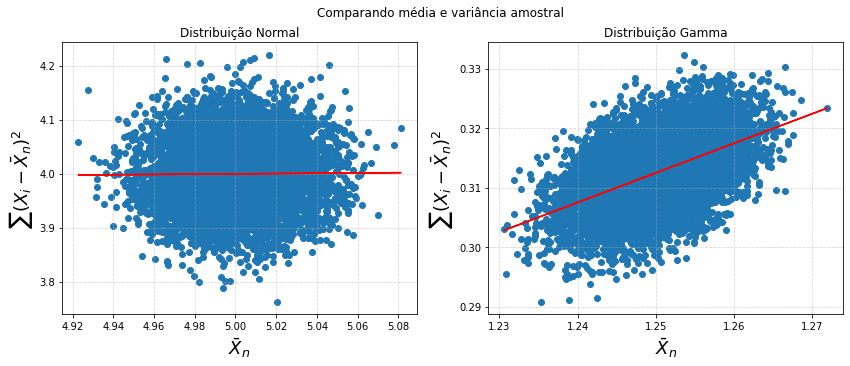

In [7]:
fig, ax = plt.subplots(1,2,figsize = (14,5))
fig.suptitle('Comparando média e variância amostral')

ax[0].scatter(means[:,0], variances[:,0])
ax[1].scatter(means[:,1], variances[:,1])
ax[0].plot(means[:,0], coef_normal[0]*means[:,0] + coef_normal[1], color = 'red')
ax[1].plot(means[:,1], coef_gamma[0]*means[:,1] + coef_gamma[1], color = 'red')


ax[0].set_xlabel(r'$\bar{X}_n$', fontsize = 18)
ax[1].set_xlabel(r'$\bar{X}_n$', fontsize = 18)
ax[0].set_ylabel(r'$\sum (X_i - \bar{X}_n)^2$', fontsize = 18)
ax[1].set_ylabel(r'$\sum (X_i - \bar{X}_n)^2$', fontsize = 18)
ax[0].set_title('Distribuição Normal')
ax[1].set_title('Distribuição Gamma')
ax[0].grid(alpha = 0.5, linestyle = '--')
ax[1].grid(alpha = 0.5, linestyle = '--')
plt.show()

*Obs: A não inclinação da reta não significa que existe independência, mas como são independentes, a gente espera que a inclinação seja pequena.* 

# Distribuições T Student 

[Artigo original](http://seismo.berkeley.edu/~kirchner/eps_120/Odds_n_ends/Students_original_paper.pdf): Olhe a página 9!

### Definição 

Sejam $Y \sim \chi^2(m)$ e $Z \sim N(0,1)$ independentes. Então 

$$
X = \frac{Z}{\left(\frac{Y}{m}\right)^{1/2}} \sim t(m)
$$

onde $t(m)$ é a distribuição t-student com $m$ graus de liberdade. 

## Função densidade de probabilidade 

Para escrever essa função de probabilidade, defina $X$ como acima e $W = Y$. Já sabemos a distribuição conjunta de $Y$ e $Z$, pois eles são independentes. Com essa  mudança de variável ([confira aqui se não lembra como é feito](http://dept.stat.lsa.umich.edu/~moulib/426-notes-3.pdf)), você conseque escrever a distribuição conjunta de $X$ e $W$. Depois, basta calcular a distribuição marginal de $X$, integrando em $W$.

$$
f(x) = \frac{\Gamma\left(\frac{m+1}{2}\right)}{(m\pi)^{1/2}\Gamma\left(\frac{m}{2}\right)}\left(1 + \frac{x^2}{m} \right)^{-(m+1)/2}, x \in \mathbb{R},
$$

onde $\Gamma$ é a [função Gamma](https://en.wikipedia.org/wiki/Gamma_function), tal que, 

1. $n \in \mathbb{N}, \Gamma(n) = (n-1)!$
2. $\Gamma(z+1) = z\Gamma(z)$ 
3. $\Gamma(1/2) = \sqrt{\pi}$

Quando $m \leq 1$, a média é divergente. Isso pode ser vizualizado pelo expoente que será $\leq -1$, o que diverge (lembre de $\int 1/x$). Quando $m > 1$, a média existe e é 0 pela simetria da distribuição. Em particular, podemos mostrar que se $k < m$, $E[|X^k|] < + \infty$ e se $k \geq m$, o momento diverge. 

Se $X \sim t(m), m > 2$, $Var(X) = \frac{m}{m-2}$

## Teorema 

Seja $X_1, ..., X_n \overset{iid}{\sim} N(\mu,\sigma^2)$. Seja

$$
\sigma ' = \left[\frac{\sum_{i=1}^n (X_i - \bar{X}_n)^2}{n-1}\right]^{1/2}
$$

Então $n^{1/2}(\bar{X}_n - \mu)/\sigma ' \sim t(n-1)$

## Relação com a Normal e Cauchy

Da mesma forma que a distribuição normal e a distribuição Cauchy, a distribuição t é centrada em $0$ e tem sua moda nesse valor. Entretanto a cauda a distribuição t (quando $x \to -\infty$ ou $x \to +\infty$), é mais pesada, no sentido de que tende para $0$ em uma velocidade menor do que a normal. Outra coisa interessante é que a ditrivuição $t(1)$ é a [distribuição Cauchy](https://en.wikipedia.org/wiki/Cauchy_distribution). Além disso, quando $n \to \infty$, converge para a pdf da normal padrão ($Normal(0,1)$).

### Ferramentas para demonstrar a convergência

1. [Teorema de Slutsky](https://lucasmoschen.github.io/TA_sessions/infestatistica/LargeRandomSamples/LargeRandomSamples/#metodo-delta): Considere o corolário com $f(x,y) = \frac{x}{y}$ 

2. [Lei dos Grandes Números](https://lucasmoschen.github.io/TA_sessions/infestatistica/LargeRandomSamples/LargeRandomSamples/#lei-dos-grandes-numeros): Escreva a qui-quadrado como soma de normais. 

In [8]:
from scipy.stats import t, norm, cauchy

## Implementação 

Primeiro vamos ver a cara da distribuição t

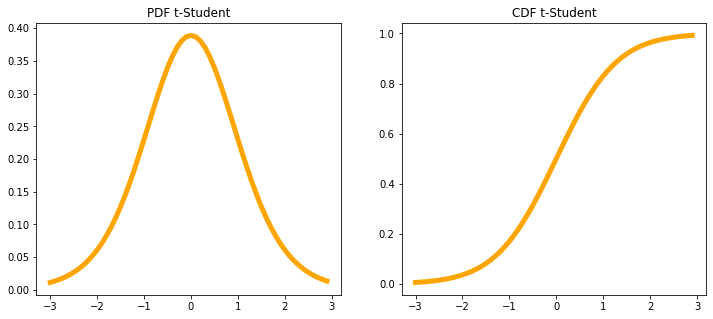

In [9]:
m = 10
X = t(df = m) 
w = np.arange(-3, 3, 0.1)

fig, ax = plt.subplots(1,2,figsize = (12,5))
ax[0].plot(w, X.pdf(w), lw = 5, color = 'orange')
ax[1].plot(w, X.cdf(w), lw = 5, color = 'orange')
ax[0].set_title('PDF t-Student')
ax[1].set_title('CDF t-Student')
plt.show()

Vamos ver o que acontece quando $m \leq 1$?

In [10]:
ite = 1000
n = 10000
m1 = 10
m2 = 0.5

means = np.zeros((ite,2))
for i in range(ite): 
    X = ro.standard_t(df = m1, size = n)
    Y = ro.standard_t(df = m2, size = n)
    means[i,0] = np.mean(X)
    means[i,1] = np.mean(Y)

<ipython-input-11-2bfd1961d53b>:3: RuntimeWarning: invalid value encountered in log
  ax[1].hist(np.log(means[:,1]), bins = 10)


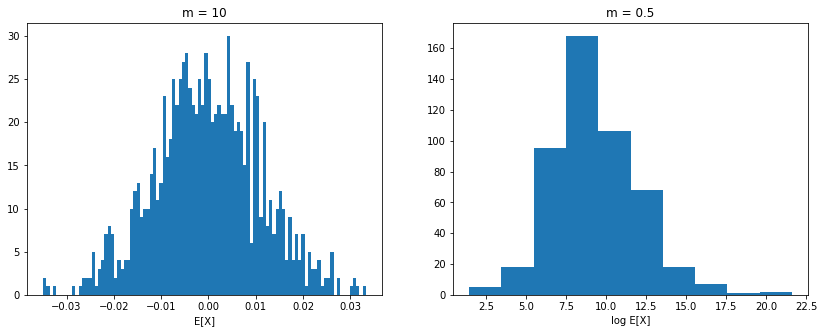

In [11]:
fig, ax = plt.subplots(1,2,figsize = (14,5))
ax[0].hist(means[:,0], bins = 100)
ax[1].hist(np.log(means[:,1]), bins = 10)
ax[0].set_xlabel('E[X]')
ax[1].set_xlabel('log E[X]')
ax[0].set_title('m = 10')
ax[1].set_title('m = 0.5')
plt.show()

No eixo $x$ do segundo gráfico plotei o logaritmo, dado que alguns resultados eram extremamente grandes! Isso indica visualmente que a média diverge!

### Relação com a Normal e com Cauchy

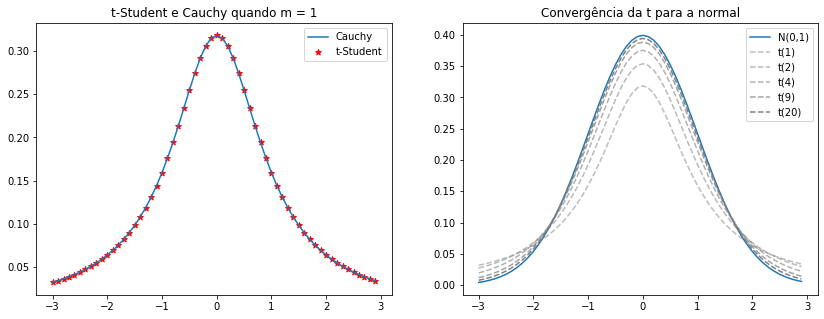

In [12]:
C = cauchy()
Z = norm(loc = 0, scale = 1) 
T = t(df = 1)

fig, ax = plt.subplots(1,2,figsize = (14,5))
ax[0].plot(w,C.pdf(w), label = 'Cauchy')
ax[0].scatter(w, T.pdf(w), c = 'red', marker = "*", label = 't-Student')
ax[0].legend()
ax[0].set_title('t-Student e Cauchy quando m = 1')
ax[1].plot(w,Z.pdf(w), label = 'N(0,1)')
ax[1].set_title('Convergência da t para a normal')

for i in np.logspace(np.log10(1), np.log10(20), 5):
    T = t(df = int(i))
    ax[1].plot(w, T.pdf(w), linestyle = '--', alpha = i/40 + 0.5, color = 'grey', label = 't({})'.format(int(i)))
ax[1].legend(loc = 'upper right')
plt.show()

# Distribuição F

Sejam $Y \sim \chi^2_m$ e $W \sim \chi^2_n$ independentes. Defina

$$
X = \frac{Y/m}{W/n} = \frac{nY}{mW}
$$

Dizemos que $X$ tem distribuição $F$. A sua motivação vem do teste de hipóteses que compara variâncias de duas normais. 

## Função de densidade de probabilidade

Seja $X \sim F_{m,n}$. Então sua pdf tem suporte em $x > 0$ e pe definida
$$
f(x) = \frac{\Gamma\left[\frac{1}{2}(m+n)\right]m^{m/2}n^{n/2}}{\Gamma\left(\frac{1}{2}m\right)\Gamma\left(\frac{1}{2}n\right)}\cdot \frac{x^{(m/2) - 1}}{(mx + n)^{(m+n)/2)}}
$$

Observe que ela não é simétrica em $m$ e $n$. Assim, se trocarmos eles de lugar, teremos um resultado diferente. 

## Propriedades 

Seja $X \sim F_{m,n}$. Então $1/X \sim F_{n,m}$. Se $Y \sim t_n$, então $Y^2 \sim F_{1,n}$. 

Existem diversas relações que são encontradas com outras distribuições. [Confira aqui](https://en.wikipedia.org/wiki/F-distribution#Properties_and_related_distributions)

$$
E[X] = \frac{n}{n-2}, n > 2
$$
$$
Var[X] = \frac{2n^2(m + n - 2)}{m(n-2)^2(n-4)}
$$


In [13]:
import numpy as np
from scipy.stats import f
import matplotlib.pyplot as plt

Vamos ver como é a cara dessa distribuição:

In [14]:
m, n = 20, 10

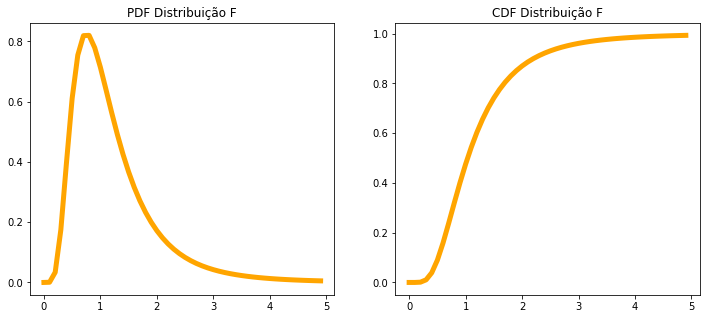

In [15]:
X = f(dfn = m, dfd = n) 
w = np.arange(0, 5, 0.1)

fig, ax = plt.subplots(1,2,figsize = (12,5))
ax[0].plot(w, X.pdf(w), lw = 5, color = 'orange')
ax[1].plot(w, X.cdf(w), lw = 5, color = 'orange')
ax[0].set_title('PDF Distribuição F')
ax[1].set_title('CDF Distribuição F')
plt.show()